## NN4: Rozwiązywanie zadania klasyfikacji
Autor: Szymon Gut

W tej pracy domowej rozłożyłem wcześniejszą architekturę na pakiety, gdyż wcześniej moje pliki Jupyter'owe ważyły za dużo. Większość kodu jest teraz w plikach pythonowych, a tutaj importuje tylko potrzebne pakiety. 
Najważniejsza kwestia `implementacja Softmax wraz z odpowiednią dla niej backpropagacją` przebiegła bez problemów. Rezultaty pracy widać w raporcie. Dla każdego zbioru danych zostały stworzone po dwie architektury (jedna z funkcją aktywacji Softmax() w ostatniej warstwie, druga z liniową funkcją aktywacji). Obie architektury dawały raczej zbliżone rezultaty. 

In [1]:
import os
os.chdir('..')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from network import NN
from activation_functions import *
from metrics import *
from prepare_data import read_classification_data

In [10]:
def plot_learn_curve(model):
    plt.plot(model.history['train'], label='Train')
    plt.plot(model.history['test'], label='Test')
    plt.xlabel('Epochs')
    plt.ylabel('F-score')
    plt.title('F-score during training and testing')
    plt.legend()
    plt.show()

In [18]:
def compare_results_plot(x_test, y_test, model1, model2):
    plt.figure(figsize=[12, 4])
    plt.subplot(131)
    plt.scatter(x_test[:, 0], x_test[:, 1], c=np.argmax(y_test, axis=1))
    plt.title('Prawidłowe wyniki')
    plt.subplot(132)
    plt.scatter(x_test[:, 0], x_test[:, 1], c=np.argmax(model1.predict(x_test), axis=1))
    plt.title('Aktywacja softmax')
    plt.subplot(133)
    plt.title('Aktywacja liniowa')
    plt.scatter(x_test[:, 0], x_test[:, 1], c=np.argmax(model2.predict(x_test), axis=1))
    plt.show()

## Zbiór rings3-regular

In [3]:
r3_x_train, r3_y_train, r3_x_test, r3_y_test = read_classification_data(
    dataset_name='rings3-regular')

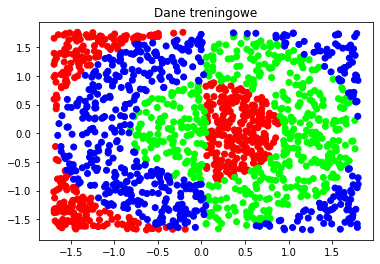

In [4]:
plt.scatter(r3_x_train[:, 0], r3_x_train[:, 1], c=r3_y_train)
plt.title('Dane treningowe')
plt.show()

### Aktywacja softmax

In [5]:
nn_r3 = NN(input_shape=r3_x_train.shape, activations=[Sigmoid(), Sigmoid(), Softmax()], neurons_num=[32, 16, 3], seed=123)

In [6]:
nn_r3.fit(r3_x_train, r3_y_train, batch_size=32, n_epochs=340, learning_rate=0.003, loss=Cross_entropy(), metric=f_score, x_test=r3_x_test, y_test=r3_y_test, verbose_step=10)

Epoch number 10/340
Loss on training set: 0.58 f_score on training set: 0.46, loss on test set: 0.57 f_score on test set: 0.46
Epoch number 20/340
Loss on training set: 0.56 f_score on training set: 0.56, loss on test set: 0.55 f_score on test set: 0.6
Epoch number 30/340
Loss on training set: 0.54 f_score on training set: 0.54, loss on test set: 0.52 f_score on test set: 0.59
Epoch number 40/340
Loss on training set: 0.48 f_score on training set: 0.62, loss on test set: 0.47 f_score on test set: 0.68
Epoch number 50/340
Loss on training set: 0.39 f_score on training set: 0.72, loss on test set: 0.39 f_score on test set: 0.74
Epoch number 60/340
Loss on training set: 0.33 f_score on training set: 0.86, loss on test set: 0.33 f_score on test set: 0.85
Epoch number 70/340
Loss on training set: 0.28 f_score on training set: 0.85, loss on test set: 0.29 f_score on test set: 0.85
Epoch number 80/340
Loss on training set: 0.25 f_score on training set: 0.86, loss on test set: 0.27 f_score on 

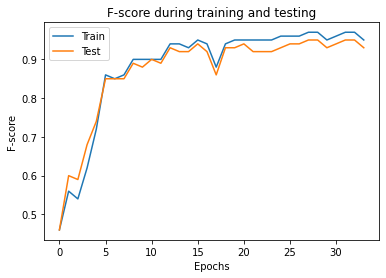

In [11]:
plot_learn_curve(nn_r3)

F-score na zbiorze treningowym

In [64]:
nn_r3.metric(nn_r3.y_train, nn_r3.predict(nn_r3.x_train))

0.9526666666666667

F-score na zbiorze testowym

In [65]:
nn_r3.metric(nn_r3.y_test, nn_r3.predict(nn_r3.x_test))

0.9335

### Aktywacja liniowa

In [14]:
nn_r3l = NN(input_shape=r3_x_train.shape, activations=[Sigmoid(), Sigmoid(), Linear()], neurons_num=[32, 16, 3], seed=12)

In [15]:
nn_r3l.fit(r3_x_train, r3_y_train, batch_size=32, n_epochs=350, learning_rate=0.003, loss=Mse(), metric=f_score, x_test=r3_x_test, y_test=r3_y_test, verbose_step=10)

Epoch number 10/350
Loss on training set: 0.21 f_score on training set: 0.45, loss on test set: 0.21 f_score on test set: 0.44
Epoch number 20/350
Loss on training set: 0.2 f_score on training set: 0.51, loss on test set: 0.18 f_score on test set: 0.6
Epoch number 30/350
Loss on training set: 0.19 f_score on training set: 0.47, loss on test set: 0.17 f_score on test set: 0.57
Epoch number 40/350
Loss on training set: 0.17 f_score on training set: 0.52, loss on test set: 0.18 f_score on test set: 0.51
Epoch number 50/350
Loss on training set: 0.16 f_score on training set: 0.58, loss on test set: 0.17 f_score on test set: 0.59
Epoch number 60/350
Loss on training set: 0.15 f_score on training set: 0.73, loss on test set: 0.16 f_score on test set: 0.71
Epoch number 70/350
Loss on training set: 0.15 f_score on training set: 0.68, loss on test set: 0.15 f_score on test set: 0.66
Epoch number 80/350
Loss on training set: 0.13 f_score on training set: 0.78, loss on test set: 0.14 f_score on t

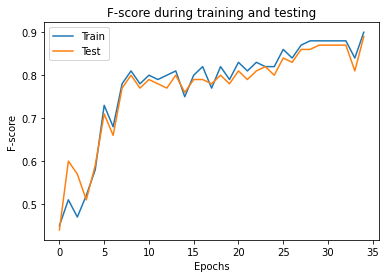

In [16]:
plot_learn_curve(nn_r3l)

F-score za zbiorze treningowym

In [63]:
nn_r3l.metric(nn_r3l.y_train, nn_r3l.predict(nn_r3l.x_train))

0.9006666666666666

F-score za zbiorze testowym

In [62]:
nn_r3l.metric(nn_r3l.y_test, nn_r3l.predict(nn_r3l.x_test))

0.8865

### Porównanie metod

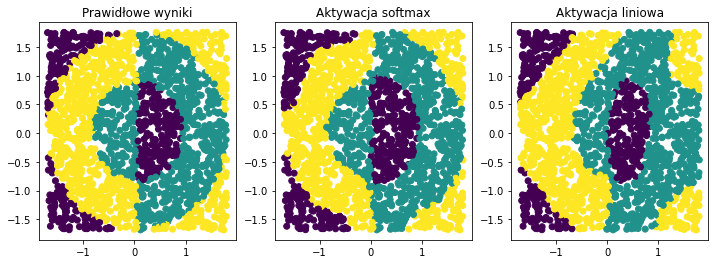

In [19]:
compare_results_plot(r3_x_test, r3_y_test, nn_r3, nn_r3l)

## Zbiór easy

In [20]:
e_x_train, e_y_train, e_x_test, e_y_test = read_classification_data(
    dataset_name='easy')

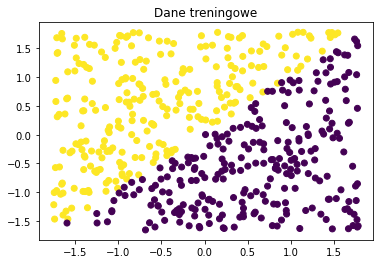

In [21]:
plt.scatter(e_x_train[:, 0], e_x_train[:, 1], c=e_y_train[:, 0])
plt.title('Dane treningowe')
plt.show()

### Aktywacja softmax

In [53]:
nn_easy = NN(input_shape=e_x_train.shape, activations=[Sigmoid(), Softmax()], neurons_num=[16, 2], seed=12)

In [54]:
nn_easy.fit(e_x_train, e_y_train, batch_size=4, n_epochs=19, learning_rate=0.003, loss=Cross_entropy(), metric=f_score, x_test=e_x_test, y_test=e_y_test, verbose_step=1)

Epoch number 1/19
Loss on training set: 0.39 f_score on training set: 0.92, loss on test set: 0.39 f_score on test set: 0.91
Epoch number 2/19
Loss on training set: 0.3 f_score on training set: 0.94, loss on test set: 0.29 f_score on test set: 0.94
Epoch number 3/19
Loss on training set: 0.25 f_score on training set: 0.96, loss on test set: 0.24 f_score on test set: 0.95
Epoch number 4/19
Loss on training set: 0.21 f_score on training set: 0.96, loss on test set: 0.21 f_score on test set: 0.97
Epoch number 5/19
Loss on training set: 0.19 f_score on training set: 0.98, loss on test set: 0.19 f_score on test set: 0.97
Epoch number 6/19
Loss on training set: 0.18 f_score on training set: 0.97, loss on test set: 0.18 f_score on test set: 0.97
Epoch number 7/19
Loss on training set: 0.16 f_score on training set: 0.98, loss on test set: 0.16 f_score on test set: 0.98
Epoch number 8/19
Loss on training set: 0.15 f_score on training set: 0.98, loss on test set: 0.15 f_score on test set: 0.99
E

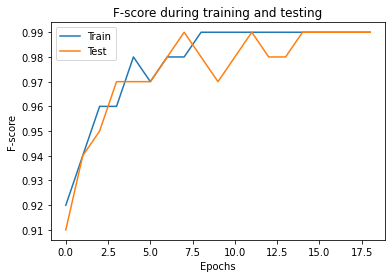

In [55]:
plot_learn_curve(nn_easy)

F-score na treningowym

In [58]:
nn_easy.metric(nn_easy.y_train, nn_easy.predict(nn_easy.x_train))

0.992

F-score na testowym

In [57]:
nn_easy.metric(nn_easy.y_test, nn_easy.predict(nn_easy.x_test))

0.99

### Aktywacja liniowa

In [46]:
nn_easy_l = NN(input_shape=e_x_train.shape, activations=[Sigmoid(), Linear()], neurons_num=[16, 2], seed=40)

In [47]:
nn_easy_l.fit(e_x_train, e_y_train, batch_size=32, n_epochs=99, learning_rate=0.003, loss=Mse(), metric=f_score, x_test=e_x_test, y_test=e_y_test, verbose_step=1)

Epoch number 1/99
Loss on training set: 0.15 f_score on training set: 0.92, loss on test set: 0.14 f_score on test set: 0.93
Epoch number 2/99
Loss on training set: 0.1 f_score on training set: 0.95, loss on test set: 0.1 f_score on test set: 0.95
Epoch number 3/99
Loss on training set: 0.09 f_score on training set: 0.96, loss on test set: 0.09 f_score on test set: 0.96
Epoch number 4/99
Loss on training set: 0.09 f_score on training set: 0.96, loss on test set: 0.09 f_score on test set: 0.94
Epoch number 5/99
Loss on training set: 0.08 f_score on training set: 0.97, loss on test set: 0.08 f_score on test set: 0.96
Epoch number 6/99
Loss on training set: 0.08 f_score on training set: 0.97, loss on test set: 0.08 f_score on test set: 0.96
Epoch number 7/99
Loss on training set: 0.08 f_score on training set: 0.96, loss on test set: 0.09 f_score on test set: 0.94
Epoch number 8/99
Loss on training set: 0.08 f_score on training set: 0.97, loss on test set: 0.08 f_score on test set: 0.97
Ep

Loss on training set: 0.05 f_score on training set: 0.99, loss on test set: 0.04 f_score on test set: 0.98
Epoch number 68/99
Loss on training set: 0.05 f_score on training set: 0.98, loss on test set: 0.04 f_score on test set: 0.98
Epoch number 69/99
Loss on training set: 0.04 f_score on training set: 0.99, loss on test set: 0.04 f_score on test set: 0.98
Epoch number 70/99
Loss on training set: 0.04 f_score on training set: 0.99, loss on test set: 0.04 f_score on test set: 0.98
Epoch number 71/99
Loss on training set: 0.04 f_score on training set: 0.98, loss on test set: 0.05 f_score on test set: 0.97
Epoch number 72/99
Loss on training set: 0.04 f_score on training set: 0.98, loss on test set: 0.04 f_score on test set: 0.99
Epoch number 73/99
Loss on training set: 0.04 f_score on training set: 0.99, loss on test set: 0.04 f_score on test set: 0.98
Epoch number 74/99
Loss on training set: 0.04 f_score on training set: 0.99, loss on test set: 0.04 f_score on test set: 0.98
Epoch numbe

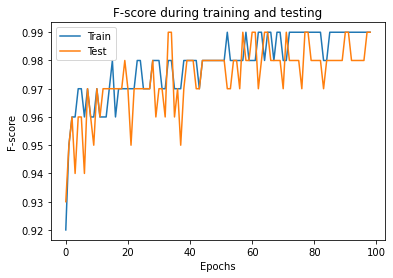

In [48]:
plot_learn_curve(nn_easy_l)

F-score na treningowym

In [60]:
nn_easy_l.metric(nn_easy_l.y_test, nn_easy.predict(nn_easy_l.x_test))

0.99

F-score na testowym

In [59]:
nn_easy_l.metric(nn_easy_l.y_test, nn_easy.predict(nn_easy_l.x_test))

0.99

### Porównanie metod

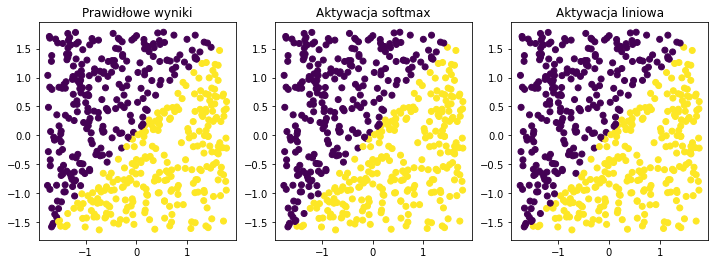

In [61]:
compare_results_plot(e_x_test, e_y_test, nn_easy, nn_easy_l)

## Zbiór xor3

In [66]:
xor_x_train, xor_y_train, xor_x_test, xor_y_test = read_classification_data(
    dataset_name='xor3')

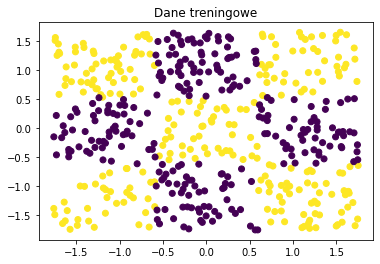

In [67]:
plt.scatter(xor_x_train[:, 0], xor_x_train[:, 1], c=xor_y_train[:, 0])
plt.title('Dane treningowe')
plt.show()

### Aktywacja softmax

In [124]:
nn_xor3 = NN(input_shape=xor_x_train.shape, activations=[Sigmoid(), Sigmoid(), Softmax()], neurons_num=[10, 10, 2], seed=40)

In [126]:
nn_xor3.fit(xor_x_train, xor_y_train, batch_size=4, n_epochs=330, learning_rate=0.01, loss=Cross_entropy(), metric=f_score, x_test=xor_x_test, y_test=xor_y_test, verbose_step=10)


Epoch number 10/330
Loss on training set: 0.01 f_score on training set: 1.0, loss on test set: 0.13 f_score on test set: 0.96
Epoch number 20/330
Loss on training set: 0.01 f_score on training set: 1.0, loss on test set: 0.13 f_score on test set: 0.96
Epoch number 30/330
Loss on training set: 0.01 f_score on training set: 1.0, loss on test set: 0.13 f_score on test set: 0.97
Epoch number 40/330
Loss on training set: 0.01 f_score on training set: 1.0, loss on test set: 0.12 f_score on test set: 0.96
Epoch number 50/330
Loss on training set: 0.01 f_score on training set: 1.0, loss on test set: 0.12 f_score on test set: 0.97
Epoch number 60/330
Loss on training set: 0.01 f_score on training set: 1.0, loss on test set: 0.12 f_score on test set: 0.97
Epoch number 70/330
Loss on training set: 0.01 f_score on training set: 1.0, loss on test set: 0.12 f_score on test set: 0.96
Epoch number 80/330
Loss on training set: 0.01 f_score on training set: 1.0, loss on test set: 0.11 f_score on test se

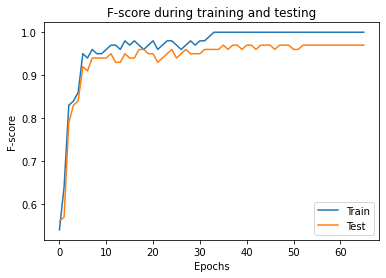

In [127]:
plot_learn_curve(nn_xor3)

F-score na zbiorze treningowym

In [128]:
nn_xor3.metric(nn_xor3.y_train, nn_xor3.predict(nn_xor3.x_train))

1.0

F-score na zbiorze testowym

In [129]:
nn_xor3.metric(nn_xor3.y_test, nn_xor3.predict(nn_xor3.x_test))

0.97

### Aktywacja liniowa

In [135]:
nn_xor3_l = NN(input_shape=xor_x_train.shape, activations=[Sigmoid(), Sigmoid(), Linear()], neurons_num=[10, 10, 2], seed=40)

In [136]:
nn_xor3_l.fit(xor_x_train, xor_y_train, batch_size=4, n_epochs=270, learning_rate=0.1, loss=Mse(), metric=f_score, x_test=xor_x_test, y_test=xor_y_test, verbose_step=10)

Epoch number 10/270
Loss on training set: 0.25 f_score on training set: 0.5, loss on test set: 0.24 f_score on test set: 0.59
Epoch number 20/270
Loss on training set: 0.24 f_score on training set: 0.62, loss on test set: 0.25 f_score on test set: 0.58
Epoch number 30/270
Loss on training set: 0.22 f_score on training set: 0.68, loss on test set: 0.25 f_score on test set: 0.59
Epoch number 40/270
Loss on training set: 0.16 f_score on training set: 0.84, loss on test set: 0.19 f_score on test set: 0.8
Epoch number 50/270
Loss on training set: 0.15 f_score on training set: 0.84, loss on test set: 0.16 f_score on test set: 0.83
Epoch number 60/270
Loss on training set: 0.13 f_score on training set: 0.86, loss on test set: 0.15 f_score on test set: 0.84
Epoch number 70/270
Loss on training set: 0.13 f_score on training set: 0.86, loss on test set: 0.16 f_score on test set: 0.82
Epoch number 80/270
Loss on training set: 0.1 f_score on training set: 0.88, loss on test set: 0.11 f_score on te

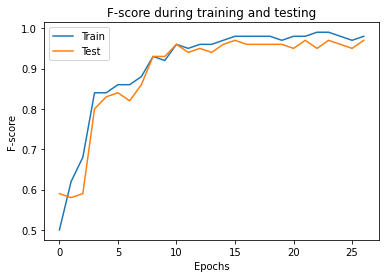

In [139]:
plot_learn_curve(nn_xor3_l)

F-score na zbiorze treningowym

In [137]:
nn_xor3_l.metric(nn_xor3_l.y_train, nn_xor3_l.predict(nn_xor3_l.x_train))

0.98

F-score na zbiorze testowym

In [138]:
nn_xor3_l.metric(nn_xor3_l.y_test, nn_xor3_l.predict(nn_xor3_l.x_test))

0.974

### Porównanie metod

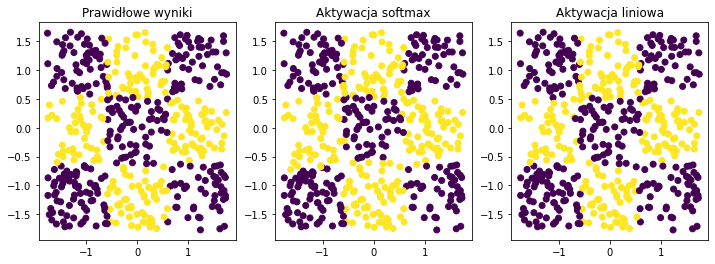

In [140]:
compare_results_plot(xor_x_test, xor_y_test, nn_xor3, nn_xor3_l)